Mike Hua

CYPLAN 255: Urban Informatics and Data Visualization

Final Project

Spring 2022

# Description

I'm hoping to use data from a crosswalk audit that Marcel Moran (Berkeley DCRP Ph.D Student) conducted in Sn Francisco and published in February. Marcel looked at all intersections in SF and recorded whether a crosswalk existed or not. I am looking at a few possibilites for data sets to analyze alongside this data, including census demographic data, open SF data, and traffic collision data from SafeTREC at UC Berkeley.

# Code

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import geopandas as gpd
import json    
import requests
import pprint
pp = pprint.PrettyPrinter
from shapely.geometry import shape


In [4]:
cw_raw = pd.read_csv('data/moran_crosswalks_sf-1.csv')
cw = gpd.GeoDataFrame(cw_raw, geometry=gpd.points_from_xy(cw_raw.longitude, cw_raw.latitude))
cw.crs = 'epsg:4326'
cw.head()

,the_geom,cartodb_id,longitude,latitude,cw_q,geometry
0,0101000020E6100000883144A9189B5EC09FE2DD36F8E0...,1,-122.423380,37.757575,True,POINT (-122.42338 37.75757)
1,0101000020E6100000E8FE452BD29D5EC0B3BC619115E1...,2,-122.465953,37.758471,True,POINT (-122.46595 37.75847)
2,0101000020E61000004E2BE0F9A09C5EC0BBEB110FCDE2...,3,-122.447325,37.771883,True,POINT (-122.44733 37.77188)
3,0101000020E610000081D7C2876D9C5EC05435E61A0BE2...,4,-122.444185,37.765964,True,POINT (-122.44419 37.76596)
4,0101000020E610000088A29B583BA05EC0CE8360FA03E3...,5,-122.503622,37.773559,True,POINT (-122.50362 37.77356)


<AxesSubplot:>

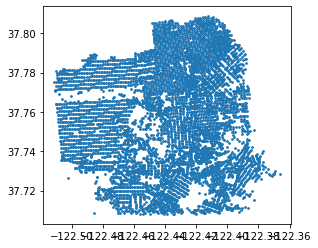

In [5]:
cw.plot(markersize=3)

In [6]:
cw.groupby(['cw_q']).count().geometry

cw_q
False    2700
True     3732
Name: geometry, dtype: int64

In [7]:
districts = gpd.read_file('https://data.sfgov.org/api/geospatial/keex-zmn4?method=export&format=Shapefile')
districts.head()
districts = districts.to_crs(4326)


In [8]:
dfsjoin = gpd.sjoin(districts, cw) #Spatial join Points to polygons
dfsjoin['cw_q'] = dfsjoin['cw_q'].map({True: 'yes_cw', False: 'no_cw'})
dfsjoin

,supname,supdist,supdistpad,supervisor,numbertext,geometry,index_right,the_geom,cartodb_id,longitude,latitude,cw_q
0,Fewer,SUPERVISORIAL DISTRICT 1,01,1.0,ONE,"POLYGON ((-122.49374 37.78761, -122.49367 37.7...",8,0101000020E6100000ABD3DC651AA05EC0E95D616644E3...,9,-122.501611,37.775525,yes_cw
0,Fewer,SUPERVISORIAL DISTRICT 1,01,1.0,ONE,"POLYGON ((-122.49374 37.78761, -122.49367 37.7...",2799,0101000020E6100000736E6EA708A05EC006F7C10146E3...,2790,-122.500528,37.775574,yes_cw
0,Fewer,SUPERVISORIAL DISTRICT 1,01,1.0,ONE,"POLYGON ((-122.49374 37.78761, -122.49367 37.7...",2862,0101000020E6100000757DD580F79F5EC02F6013E346E3...,2853,-122.499481,37.775601,yes_cw
0,Fewer,SUPERVISORIAL DISTRICT 1,01,1.0,ONE,"POLYGON ((-122.49374 37.78761, -122.49367 37.7...",1968,0101000020E61000009016C2C5E59F5EC0C95CD73749E3...,1960,-122.498399,37.775672,yes_cw
0,Fewer,SUPERVISORIAL DISTRICT 1,01,1.0,ONE,"POLYGON ((-122.49374 37.78761, -122.49367 37.7...",1834,0101000020E6100000DB8F6F4AD49F5EC0DA937ECA4AE3...,1826,-122.497332,37.775720,yes_cw
...,...,...,...,...,...,...,...,...,...,...,...,...
10,Safai,SUPERVISORIAL DISTRICT 11,11,11.0,ELEVEN,"POLYGON ((-122.42247 37.71789, -122.42249 37.7...",3732,0101000020E61000006B274A42A29C5EC00C40FE2D5CDB...,3926,-122.447403,37.713751,no_cw
10,Safai,SUPERVISORIAL DISTRICT 11,11,11.0,ELEVEN,"POLYGON ((-122.42247 37.71789, -122.42249 37.7...",5326,0101000020E6100000244AD63CA29C5EC071E7802C5DDB...,5325,-122.447402,37.713781,no_cw
10,Safai,SUPERVISORIAL DISTRICT 11,11,11.0,ELEVEN,"POLYGON ((-122.42247 37.71789, -122.42249 37.7...",2478,0101000020E610000083CE5AC0BA9C5EC057C5652662DB...,2469,-122.448898,37.713933,yes_cw
10,Safai,SUPERVISORIAL DISTRICT 11,11,11.0,ELEVEN,"POLYGON ((-122.42247 37.71789, -122.42249 37.7...",1719,0101000020E61000005E1844FF5F9C5EC0276B922762DB...,1712,-122.443359,37.713933,yes_cw


In [9]:
# Count crosswalks in each district
dfpivot = pd.pivot_table(dfsjoin,index='supdistpad',columns='cw_q',aggfunc={'cw_q':len})
dfpivot.columns = dfpivot.columns.droplevel()
cw_bydist = districts.merge(dfpivot, how='left', on='supdistpad')

# Add percentage columns
cw_bydist['total_cw'] = cw_bydist['yes_cw'] + cw_bydist['no_cw']
cw_bydist['yes_cw_pct'] = cw_bydist['yes_cw'] / cw_bydist['total_cw'] * 100
cw_bydist['no_cw_pct'] = cw_bydist['no_cw'] / cw_bydist['total_cw'] * 100
cw_bydist

,supname,supdist,supdistpad,supervisor,numbertext,geometry,no_cw,yes_cw,total_cw,yes_cw_pct,no_cw_pct
0,Fewer,SUPERVISORIAL DISTRICT 1,01,1.0,ONE,"POLYGON ((-122.49374 37.78761, -122.49367 37.7...",119,336,455,73.846154,26.153846
1,Stefani,SUPERVISORIAL DISTRICT 2,02,2.0,TWO,"POLYGON ((-122.41922 37.80845, -122.41921 37.8...",139,458,597,76.716918,23.283082
2,Peskin,SUPERVISORIAL DISTRICT 3,03,3.0,THREE,"POLYGON ((-122.39198 37.79387, -122.39218 37.7...",113,294,407,72.235872,27.764128
3,Mar,SUPERVISORIAL DISTRICT 4,04,4.0,FOUR,"POLYGON ((-122.47485 37.76179, -122.47496 37.7...",280,277,557,49.730700,50.269300
4,Preston,SUPERVISORIAL DISTRICT 5,05,5.0,FIVE,"POLYGON ((-122.42157 37.78662, -122.42145 37.7...",82,394,476,82.773109,17.226891
5,Haney,SUPERVISORIAL DISTRICT 6,06,6.0,SIX,"MULTIPOLYGON (((-122.39382 37.79374, -122.3931...",82,357,439,81.321185,18.678815
6,Yee,SUPERVISORIAL DISTRICT 7,07,7.0,SEVEN,"POLYGON ((-122.44854 37.75904, -122.44847 37.7...",501,344,845,40.710059,59.289941
7,Mandelman,SUPERVISORIAL DISTRICT 8,08,8.0,EIGHT,"POLYGON ((-122.42327 37.77206, -122.42325 37.7...",283,300,583,51.457976,48.542024
8,Ronen,SUPERVISORIAL DISTRICT 9,09,9.0,NINE,"POLYGON ((-122.41093 37.76941, -122.41088 37.7...",346,317,663,47.812971,52.187029
9,Walton,SUPERVISORIAL DISTRICT 10,10,10.0,TEN,"MULTIPOLYGON (((-122.39905 37.76973, -122.3981...",371,417,788,52.918782,47.081218


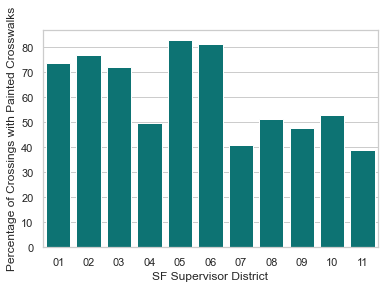

In [37]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="supdistpad", y="yes_cw_pct", data=cw_bydist, color="teal", saturation=.8)
ax.set(xlabel='SF Supervisor District', ylabel='Percentage of Crossings with Painted Crosswalks')
plt.show()

<AxesSubplot:>

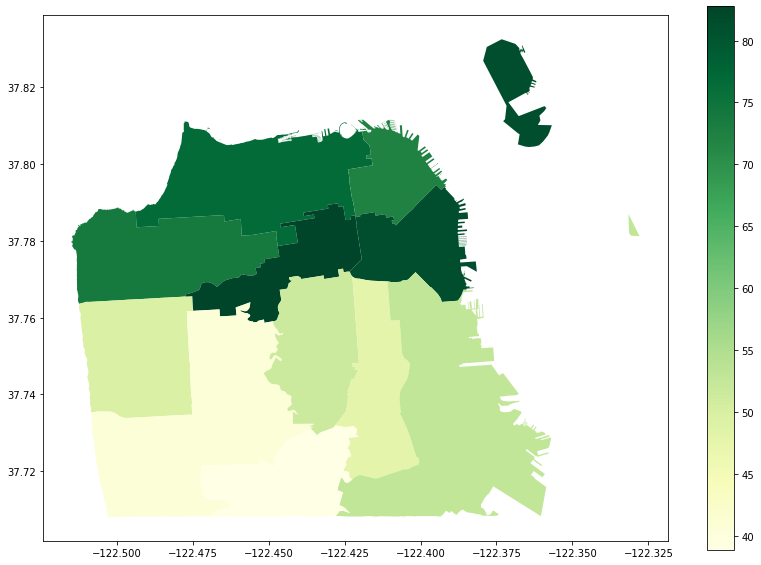

In [46]:
# map the data
cw_bydist.plot(column = 'yes_cw_pct',cmap='YlGn', figsize=(14,10), legend=True)

In [24]:
# API data

# speed_limit_gj = requests.get('https://data.sfgov.org/resource/3t7b-gebn.geojson') # Speed Limit GEOJSON
speed_lim = pd.read_csv('https://data.sfgov.org/resource/3t7b-gebn.csv') # Speed Limit CSV
speed_lim.head()

,cnn,street,st_type,from_st,to_st,speedlimit,schoolzone,schoolzone_limit,mtab_date,mtab_motion,mtab_reso_text,status,workorder,shape
0,0.0,NaN,NaN,NaN,NaN,15,YES,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-122.412186 37.75583, -122.4..."
1,110000.0,01ST,ST,CLEMENTINA ST,FOLSOM ST,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-122.395 37.787712, -122.394..."
2,112000.0,01ST,ST,GUY PL,LANSING ST,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-122.393906 37.786846, -122...."
3,109000.0,01ST,ST,TENNY PL,CLEMENTINA ST,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-122.39541 37.78804, -122.39..."
4,107000.0,01ST,ST,HOWARD ST,TEHAMA ST,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-122.39602 37.788532, -122.3..."


In [31]:
speed_lim['speedlimit'].unique()

array([15, 25, 30, 35])

In [30]:
# remove rows with 0 speed limit
speed_lim = speed_lim[speed_lim['speedlimit'] != 0]


In [54]:
# remove rows with NaN Street Name
speed_lim = speed_lim[speed_lim['street'].notna()]

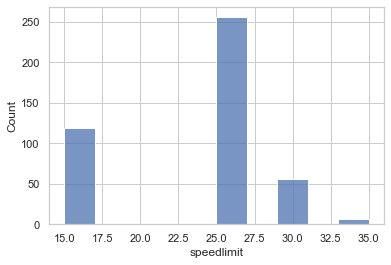

In [58]:
ax = sns.histplot(data=speed_lim, x="speedlimit")

In [13]:
# sl_geom = [shape(i) for i in speed_limit]
# sl = gpd.GeoDataFrame({'geometry':sl_geom})

AttributeError: 'bytes' object has no attribute 'get'